In [305]:
#importing the necessary panda Python library:
import pandas as pd

## reading the train dataset:
train=pd.read_csv('SaYoPillow.csv')


In [306]:
#importing seaborn library to make statistical graphics as per the provided dataset.  
import seaborn as sns

In [307]:
#info() function to print a concise summary of a DataFrame. 
#i.e. information about a DataFrame including the index dtype 
#and column dtypes,
#non-null values and memory usage.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [308]:
#Preprocessing:
# returning a copy of a string. Thus, the old substring remains the same,
#but a new copy gets created. 
#The label column in this dataset contains labels as 0,1,2,3 an 4.
#0 means no stress-low stress,
#1 means medium low stress, 2 means medium stress, 
#3 means medium high stress and 4 means high stress. 
#I have used above mentioned names instead of 0, 1,2,3 and 4 
#and selected the text 
#and label columns for the process of training a machine learning model:

train.sl=train.sl.replace({0:'low/normal',1:'medium low' , 2: 'medium', 3:'medium high', 4:'high'})

# defining value_counts() function to return object containing counts
#of unique values. 
train.sl.value_counts()

high           126
medium high    126
low/normal     126
medium         126
medium low     126
Name: sl, dtype: int64

In [309]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    object 
dtypes: float64(8), object(1)
memory usage: 44.4+ KB


In [310]:
#labelencoder to convert stress attribute into numerical value
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['sl'] = encoder.fit_transform(train['sl']) 
stress = {index : label for index, label in enumerate(encoder.classes_)}
stress


{0: 'high', 1: 'low/normal', 2: 'medium', 3: 'medium high', 4: 'medium low'}

In [311]:
#returning the number of unique values for each column:
train.nunique()

sr      627
rr      626
t       626
lm      626
bo      626
rem     626
sr.1    501
hr      626
sl        5
dtype: int64

In [312]:
#shape of data
train.shape

(630, 9)

In [313]:
#dropping duplicate datas:
train.drop_duplicates(inplace=True)
train.shape

(630, 9)

In [314]:
#Showing summary of all the data of all fields.
train.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.68,91.84,16.60,89.84,99.60,1.84,74.20,3
1,91.64,25.10,91.55,15.88,89.55,98.88,1.55,72.76,3
2,60.00,20.00,96.00,10.00,95.00,85.00,7.00,60.00,4
3,85.76,23.54,90.77,13.92,88.77,96.92,0.77,68.84,3
4,48.12,17.25,97.87,6.50,96.25,72.48,8.25,53.12,1


In [315]:
train.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.68,91.84,16.60,89.84,99.60,1.84,74.20,3
1,91.64,25.10,91.55,15.88,89.55,98.88,1.55,72.76,3
2,60.00,20.00,96.00,10.00,95.00,85.00,7.00,60.00,4
3,85.76,23.54,90.77,13.92,88.77,96.92,0.77,68.84,3
4,48.12,17.25,97.87,6.50,96.25,72.48,8.25,53.12,1


In [316]:
#renaming the parameters name for better understanding:
train.rename(columns = {'sr':'snoring rate', 'rr':'respiration rate',
                        't':'body temperature', 'lm':'limb movement', 
                        'bo':'blood oxygen', 'rem':'eye movement', 
                        'sr.1':'sleeping hours','hr':'heart rate', 
                        'sl':'stress level'}, inplace = True)

#Showing summary of all the data after renaming:
train.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,93.80,25.68,91.84,16.60,89.84,99.60,1.84,74.20,3
1,91.64,25.10,91.55,15.88,89.55,98.88,1.55,72.76,3
2,60.00,20.00,96.00,10.00,95.00,85.00,7.00,60.00,4
3,85.76,23.54,90.77,13.92,88.77,96.92,0.77,68.84,3
4,48.12,17.25,97.87,6.50,96.25,72.48,8.25,53.12,1


In [317]:
#showing correlation between columns or within data:
train.corr()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
snoring rate,1.00,0.98,-0.90,0.98,-0.90,0.95,-0.92,0.98,-0.34
respiration rate,0.98,1.00,-0.89,0.99,-0.89,0.94,-0.89,1.00,-0.39
body temperature,-0.90,-0.89,1.00,-0.90,1.00,-0.86,0.95,-0.89,0.34
limb movement,0.98,0.99,-0.90,1.00,-0.90,0.96,-0.90,0.99,-0.31
blood oxygen,-0.90,-0.89,1.00,-0.90,1.00,-0.86,0.95,-0.89,0.36
eye movement,0.95,0.94,-0.86,0.96,-0.86,1.00,-0.89,0.94,-0.15
sleeping hours,-0.92,-0.89,0.95,-0.90,0.95,-0.89,1.00,-0.89,0.23
heart rate,0.98,1.00,-0.89,0.99,-0.89,0.94,-0.89,1.00,-0.39
stress level,-0.34,-0.39,0.34,-0.31,0.36,-0.15,0.23,-0.39,1.00


<AxesSubplot:>

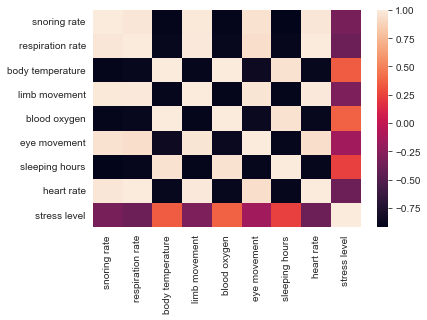

In [318]:
#plotting dataframe into heatmap:
sns.heatmap(data=train.corr())

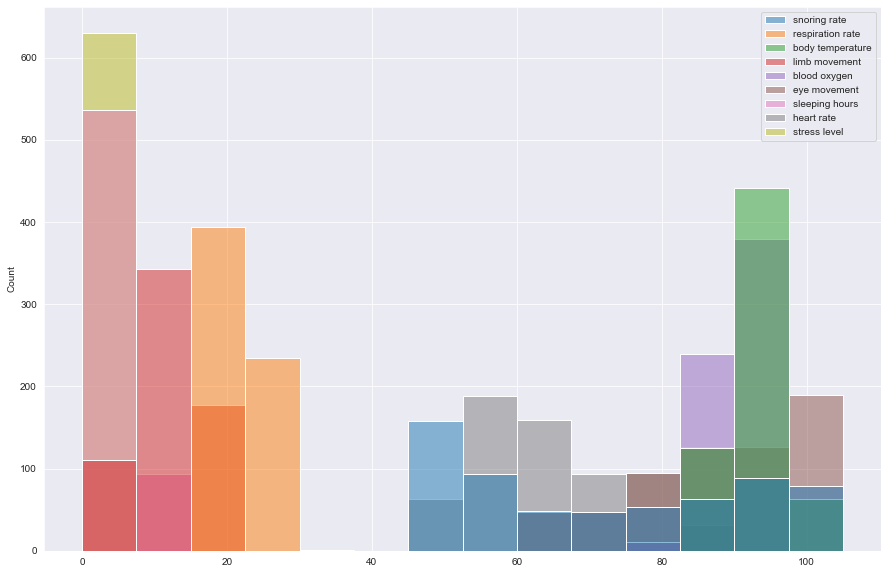

In [319]:
#datavisualizing:
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
plt.figure(figsize=(15, 10)) # defining the size of figure using matplotlib.
sns.histplot(train)  # Passing of stress values and plotting in histogram.
plt.show() 

In [320]:
#Once again showing summary of all the data after visualizing:
train.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,93.80,25.68,91.84,16.60,89.84,99.60,1.84,74.20,3
1,91.64,25.10,91.55,15.88,89.55,98.88,1.55,72.76,3
2,60.00,20.00,96.00,10.00,95.00,85.00,7.00,60.00,4
3,85.76,23.54,90.77,13.92,88.77,96.92,0.77,68.84,3
4,48.12,17.25,97.87,6.50,96.25,72.48,8.25,53.12,1


In [321]:
#Solving Stress detection using Lazy Predict.
# importing lazypredict library:
import lazypredict


In [322]:
# importing LazyClassifier for classification problem 
#because here I am solving Classification use case:
from lazypredict.Supervised import LazyClassifier

In [323]:
# importing numpy Python library:
import numpy as np

In [324]:
#spliting dataset into training and testing part
#Preparing the train and test splits
from sklearn.model_selection import train_test_split

In [325]:
# Using pop() and storing the return value:
y = train.pop('stress level')
X = train

In [326]:

#splitting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)

In [327]:
#creating an object of LazyClassifier class:
clf = LazyClassifier(verbose=0,predictions=True)



# model fitting data in LazyClassifier:
# Here “clf” is returning two values i.e Model and Prediction:
# model means all the models and with some metrics and
# prediction means all the predicted value that is ŷ.
models,predictions = clf.fit(X_train, X_test, y_train, y_test)


100%|██████████| 29/29 [00:01<00:00, 16.80it/s]


In [328]:
#printing or showing which model did better on Stress detection:
models



,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,1.00,1.00,None,1.00,0.03
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.01
NearestCentroid,1.00,1.00,None,1.00,0.01
LogisticRegression,1.00,1.00,None,1.00,0.05
LinearDiscriminantAnalysis,1.00,1.00,None,1.00,0.02
LabelSpreading,1.00,1.00,None,1.00,0.04
LabelPropagation,1.00,1.00,None,1.00,0.03
KNeighborsClassifier,1.00,1.00,None,1.00,0.02
GaussianNB,1.00,1.00,None,1.00,0.01


In [329]:
#Showing predicted summary data result: 
predictions.head()

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,4,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,2,2,1,1,1,1,4,1,1,1
3,2,4,1,4,4,3,4,4,4,4,...,2,4,4,4,4,4,4,4,4,4
4,2,3,0,3,3,0,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [330]:
# showing the precision, recall, F1 Score and support score of my trained classification model.
from sklearn.metrics import classification_report
for i in predictions.columns.tolist():
    print('\t\t',i,'\n')
    print(classification_report(y_test, predictions[i]),'\n')

		 AdaBoostClassifier 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        25
           2       0.33      1.00      0.50        25
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        25

    accuracy                           0.59       126
   macro avg       0.46      0.59      0.49       126
weighted avg       0.45      0.59      0.49       126
 

		 BaggingClassifier 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      1.00      1.00        25
           2       1.00      0.96      0.98        25
           3       0.96      0.96      0.96        26
           4       1.00      1.00      1.00        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98     

In [331]:
train.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate
0,93.80,25.68,91.84,16.60,89.84,99.60,1.84,74.20
1,91.64,25.10,91.55,15.88,89.55,98.88,1.55,72.76
2,60.00,20.00,96.00,10.00,95.00,85.00,7.00,60.00
3,85.76,23.54,90.77,13.92,88.77,96.92,0.77,68.84
4,48.12,17.25,97.87,6.50,96.25,72.48,8.25,53.12
